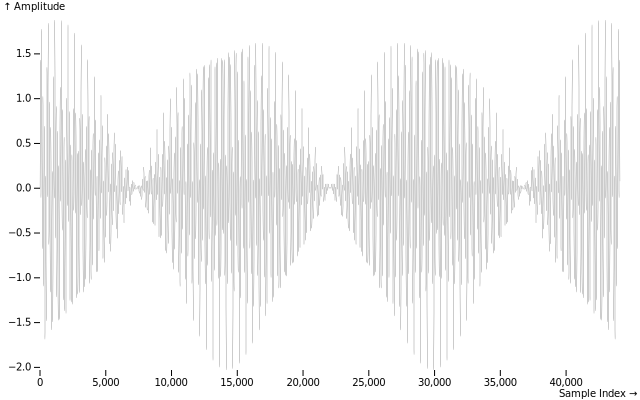

In [6]:
import { document } from 'jsr:@ry/jupyter-helper'
import * as Plot from 'npm:@observablehq/plot'
// import { DOMParser, SVGElement } from 'npm:linkedom';

// const document = new DOMParser().parseFromString(
//   `<!DOCTYPE html><html lang="en"></html>`,
//   'text/html',
// );

export const sampleRate = 44100
const samplesLength = sampleRate * 1 // 1 second of audio
const samplesStart = 0
const samples = new Float32Array(samplesLength).fill(0)

// Create seveal sine waves with different frequencies and amplitudes
const sines = [
  { frequency: 88, amplitude: 0.75 },
  { frequency: 172, amplitude: 0.3 },
  { frequency: 440, amplitude: 1 },
]
for (let i = 0; i < samplesLength; i++) {
  for (const { frequency, amplitude } of sines) {
    samples[i] += amplitude * Math.sin((2 * Math.PI * frequency * i) / sampleRate)
  }
  // add some variation to the overall amplitude
  samples[i] *= Math.cos((3 * Math.PI * i) / sampleRate)
}

const waveformData = Array.from(samples).map((value, index) => ({ x: index, y: value }))

Plot.plot({
  marks: [
    Plot.line(waveformData, { x: 'x', y: 'y', strokeWidth: 0.1, stroke: 'black' }),
  ],
  x: { label: 'Sample Index' },
  y: { label: 'Amplitude' },
  document,
})


In [18]:
import { generateSpectrogram } from './src/spectrogram.ts'
import { document } from 'jsr:@ry/jupyter-helper'
import * as Plot from 'npm:@observablehq/plot'

const result = generateSpectrogram(
  samples,
  samplesStart,
  samplesLength,
  {
    sampleRate,
    windowSize: 4096,
    windowStepSize: Math.pow(2, 6),
    // scaleSize: 100,
    // minFrequencyHz: Math.min(...sines.map((s) => s.frequency)) - 100,
    maxFrequencyHz: Math.max(...sines.map((s) => s.frequency)) + 100,
  },
)

const { windowCount, options, spectrogram } = result
const { scaleSize, maxFrequencyHz } = options

// Reshape the 1D spectrogram array into a 2D array

// const heatmap = [];
// for (let window = 0; window < windowCount; window++) {
//   for (let f = 0; f < scaleSize; f++) {
//     const frequency = f * maxFrequencyHz / scaleSize;
//     const amplitude = spectrogram[window * scaleSize + f];
//     heatmap.push({ window, frequency, amplitude });
//   }
// }
// // console.log(heatmap);

Plot.plot({
  marks: [
    Plot.contour(
      {
        x1: 0,
        x2: windowCount,
        y1: 0,
        y2: maxFrequencyHz,
        fill: (x, y) => {
          const index = Math.floor(x) * scaleSize +
            Math.floor(y * scaleSize / maxFrequencyHz)
          return spectrogram[index]
        },
        // blur: 0.5,
      },
    ),
  ],
  x: { 
    label: 'Time', 
    ticks: 10,
    tickFormat: (d) => `${(d * options.windowStepSize / sampleRate).toFixed(2)}s`,
  },
  y: { label: 'Frequency', tickSpacing: 40 },
  color: { scheme: 'viridis' },
  title: "Spectrogram",
  width: 800,
  // height: 400,
  document,
})


Spectrogram 0 50 100 150 200 250 300 350 400 450 500 ↑ Frequency 0.00s 0.07s 0.15s 0.22s 0.29s 0.36s 0.44s 0.51s 0.58s 0.65s 0.73s 0.80s 0.87s Time → <path fill="#440154" d="M780,21L780,23L780,25L780,27L780,29L780,31L780,33L780,35L780,37L780,39L780,41L780,43L780,45L780,47L780,49L780,51L780,53L780,55L780,57L780,59L780,61L780,63L780,65L780,67L780,69L780,71L780,73L780,75L780,77L780,79L780,81L780,83L780,85L780,87L780,89L780,91L780,93L780,95L780,97L780,99L780,101L780,103L780,105L780,107L780,109L780,111L780,113L780,115L780,117L780,119L780,121L780,123L780,125L780,127L780,129L780,131L780,133L780,135L780,137L780,139L780,141L780,143L780,145L780,147L780,149L780,151L780,153L780,155L780,157L780,159L780,161L780,163L780,165L780,167L780,169L780,171L780,173L780,175L780,177L780,179L780,181L780,183L780,185L780,187L780,189L780,191L780,193L780,195L780,197L780,199L780,201L780,203L780,205L780,207L780,209L780,211L780,213L780,215L780,217L780,219L780,221L780,223L780,225L780,227L780,229L780,231L780,233L780,235L780,237L780,239L780,241L780,243L780,245L780,247L780,249L780,251L780,253L780,255L780,257L780,259L780,261L780,263L780,265L780,267L780,269L780,271L780,273L780,275L780,277L780,279L780,281L780,283L780,285L780,287L780,289L780,291L780,293L780,295L780,297L780,299L780,301L780,303L780,305L780,307L780,309L780,311L780,313L780,315L780,317L780,319L780,321L780,323L780,325L780,327L780,329L780,331L780,333L780,335L780,337L780,339L780,341L780,343L780,345L780,347L780,349L780,351L780,353L780,355L780,357L780,359L780,361L780,363L780,365L780,367L780,369L779,370L777,370L775,370L773,370L771,370L769,370L767,370L765,370L763,370L761,370L759,370L757,370L755,370L753,370L751,370L749,370L747,370L745,370L743,370L741,370L739,370L737,370L735,370L733,370L731,370L729,370L727,370L725,370L723,370L721,370L719,370L717,370L715,370L713,370L711,370L709,370L707,370L705,370L703,370L701,370L699,370L697,370L695,370L693,370L691,370L689,370L687,370L685,370L683,370L681,370L679,370L677,370L675,370L673,370L671,370L669,370L667,370L665,370L663,370L661,370L659,370L657,370L655,370L653,370L651,370L649,370L647,370L645,370L643,370L641,370L639,370L637,370L635,370L633,370L631,370L629,370L627,370L625,370L623,370L621,370L619,370L617,370L615,370L613,370L611,370L609,370L607,370L605,370L603,370L601,370L599,370L597,370L595,370L593,370L591,370L589,370L587,370L585,370L583,370L581,370L579,370L577,370L575,370L573,370L571,370L569,370L567,370L565,370L563,370L561,370L559,370L557,370L555,370L553,370L551,370L549,370L547,370L545,370L543,370L541,370L539,370L537,370L535,370L533,370L531,370L529,370L527,370L525,370L523,370L521,370L519,370L517,370L515,370L513,370L511,370L509,370L507,370L505,370L503,370L501,370L499,370L497,370L495,370L493,370L491,370L489,370L487,370L485,370L483,370L481,370L479,370L477,370L475,370L473,370L471,370L469,370L467,370L465,370L463,370L461,370L459,370L457,370L455,370L453,370L451,370L449,370L447,370L445,370L443,370L441,370L439,370L437,370L435,370L433,370L431,370L429,370L427,370L425,370L423,370L421,370L419,370L417,370L415,370L413,370L411,370L409,370L407,370L405,370L403,370L401,370L399,370L397,370L395,370L393,370L391,370L389,370L387,370L385,370L383,370L381,370L379,370L377,370L375,370L373,370L371,370L369,370L367,370L365,370L363,370L361,370L359,370L357,370L355,370L353,370L351,370L349,370L347,370L345,370L343,370L341,370L339,370L337,370L335,370L333,370L331,370L329,370L327,370L325,370L323,370L321,370L319,370L317,370L315,370L313,370L311,370L309,370L307,370L305,370L303,370L301,370L299,370L297,370L295,370L293,370L291,370L289,370L287,370L285,370L283,370L281,370L279,370L277,370L275,370L273,370L271,370L269,370L267,370L265,370L263,370L261,370L259,370L257,370L255,370L253,370L251,370L249,370L247,370L245,370L243,370L241,370L239,370L237,370L235,370L233,370L231,370L229,370L227,370L225,370L223,370L221,370L219,370L217,370L215,370L213,370L211,370L209,370L207,370L205,370L203,370L201,370L199,370L197,370L195,370L193,370L191,370L189,370L187,370L185,370L183,370L181,370L179,370L177,370L175,370L173,370L171,370L169,370L167,370L165,370L1